#Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram

#Data Loading and Preprocessing

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

#Convert to DataFrame for EDA

In [ ]:
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['Species'] = y

#Display a few records

In [ ]:
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#Label Encoding

In [ ]:
encoder = LabelEncoder()
iris_df['Species'] = encoder.fit_transform(iris_df['Species'])

#K means clustering implementation

In [ ]:
def initialize_centroids(X, k):
    centroids_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroids_indices]
    return centroids

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    clusters = np.argmin(distances, axis=1)
    return clusters

def update_centroids(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(X[clusters == i], axis=0)
    return centroids

def kmeans(X, k, max_iterations=100):
    centroids = initialize_centroids(X, k)

    for _ in range(max_iterations):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids

#Hierarchical clustering implementation

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def compute_distance_matrix(X):
    n = X.shape[0]
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = euclidean_distance(X[i], X[j])
    return distance_matrix


def agglomerative_clustering(X, n_clusters):
    n = X.shape[0]
    clusters = [[i] for i in range(n)]
    distance_matrix = compute_distance_matrix(X)
    while len(clusters) > n_clusters:
        min_distance = np.inf
        merge_indices = None
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                distance = 0
                for idx1 in clusters[i]:
                    for idx2 in clusters[j]:
                        distance += distance_matrix[idx1, idx2]
                distance /= (len(clusters[i]) * len(clusters[j]))
                if distance < min_distance:
                    min_distance = distance
                    merge_indices = (i, j)
        i, j = merge_indices
        clusters[i].extend(clusters[j])
        del clusters[j]
    return clusters


# Elbow method to find optimal k




In [ ]:

def elbow_method(X, max_k=10):
    distortions = []
    K = range(1, max_k + 1)
    for k in K:
        _, centroids = kmeans(X, k)
        distortion = np.sum(np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1))
        distortions.append(distortion)


    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

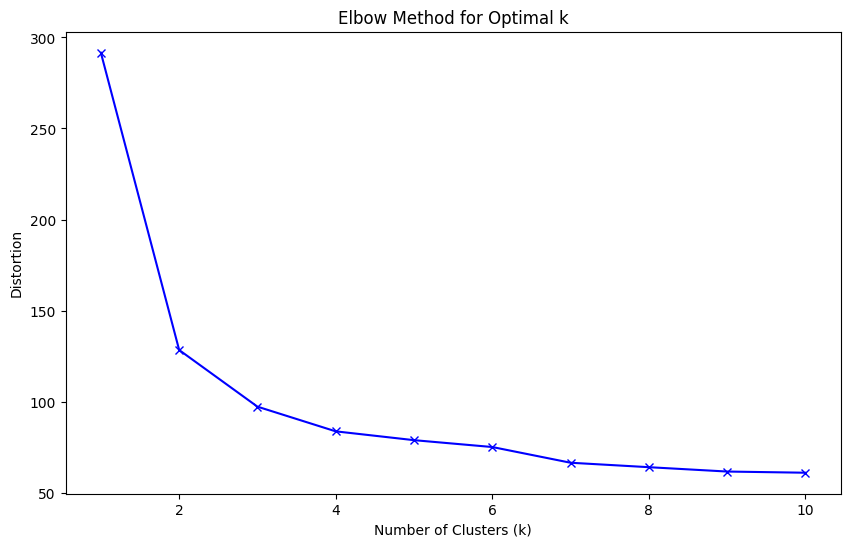

In [ ]:
elbow_method(X)


#Apply k means

In [ ]:
kmeans_clusters, kmeans_centroids = kmeans(X, k=3)

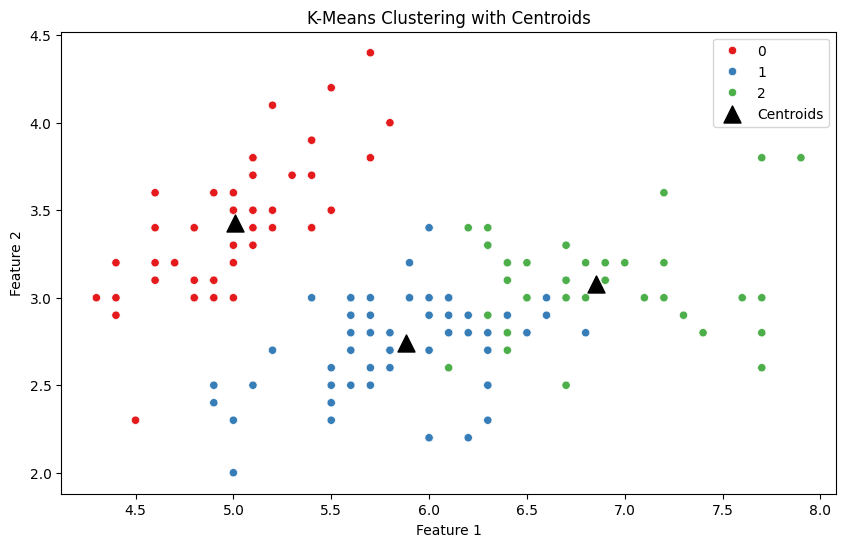

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans_clusters, palette="Set1", legend="full")
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker='^', s=150, color='k', label='Centroids')
plt.title("K-Means Clustering with Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

#Apply hierarchical Algorithm

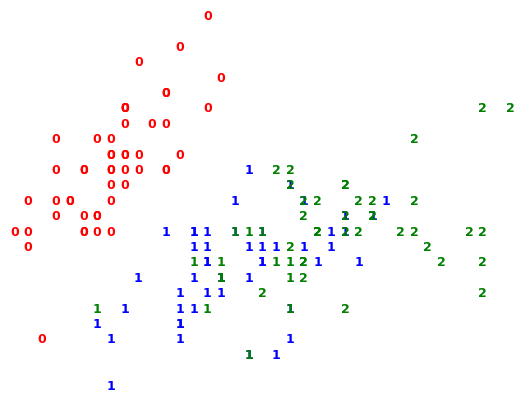

In [ ]:

n_clusters = 3
clusters = agglomerative_clustering(X, n_clusters)

labels = np.zeros(X.shape[0])
for i, cluster in enumerate(clusters):
    labels[cluster] = i


X_plot = preprocessing.MinMaxScaler().fit_transform(X)


colours = 'rbg'
for i in range(X.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(int(labels[i])),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


#Confusion matrix for k-means

In [ ]:
kmeans_conf_matrix = confusion_matrix(y, kmeans_clusters)
print("K-Means Confusion Matrix:\n", kmeans_conf_matrix)
print("\nK-Means Classification Report:\n", classification_report(y, kmeans_clusters))

K-Means Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]

K-Means Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.94      0.85        50
           2       0.92      0.72      0.81        50

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



#Confusion matrix for Hierarchial algorithm

In [ ]:
cluster_labels = np.zeros(X.shape[0])
for i, cluster in enumerate(clusters):
    cluster_labels[cluster] = np.argmax(np.bincount(y[cluster]))
conf_matrix = confusion_matrix(y, cluster_labels)


class_report = classification_report(y, cluster_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0 14 36]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.78      1.00      0.88        50
           2       1.00      0.72      0.84        50

    accuracy                           0.91       150
   macro avg       0.93      0.91      0.90       150
weighted avg       0.93      0.91      0.90       150

